<a href="https://colab.research.google.com/github/hushuhushu637/Husnaara/blob/master/FDS_CBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


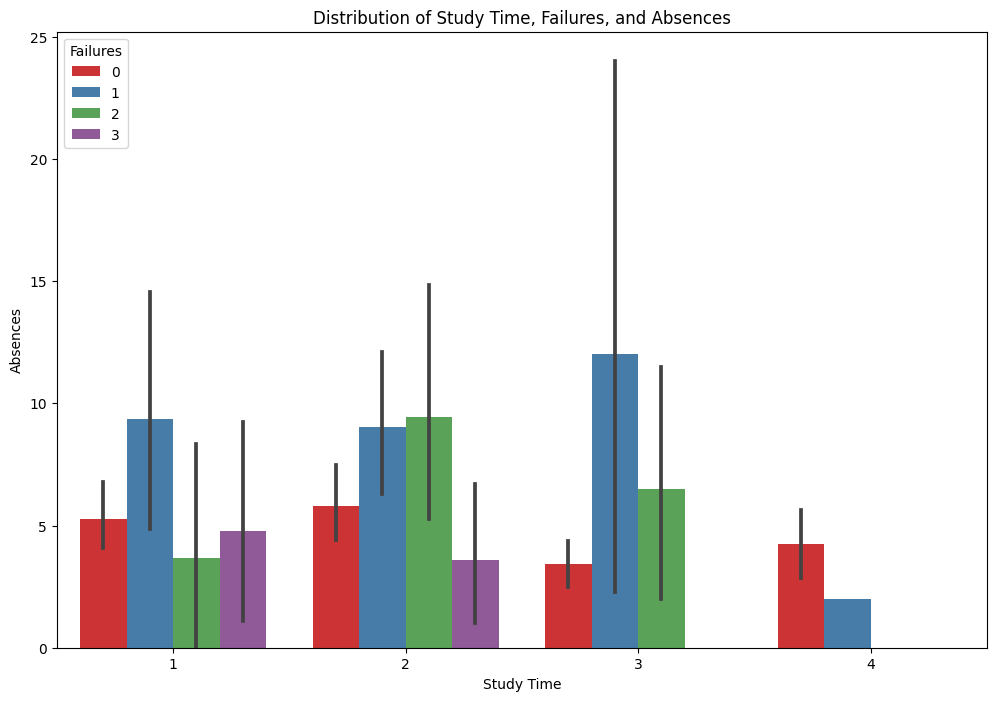

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Plot a grouped bar chart for Study Time, Failures, and Absences
sns.barplot(x='studytime', y='absences', hue='failures', data=df, palette='Set1')

# Add labels and title
plt.xlabel('Study Time')
plt.ylabel('Absences')
plt.title('Distribution of Study Time, Failures, and Absences')

# Add legend
plt.legend(title='Failures')

# Display the plot
plt.show()

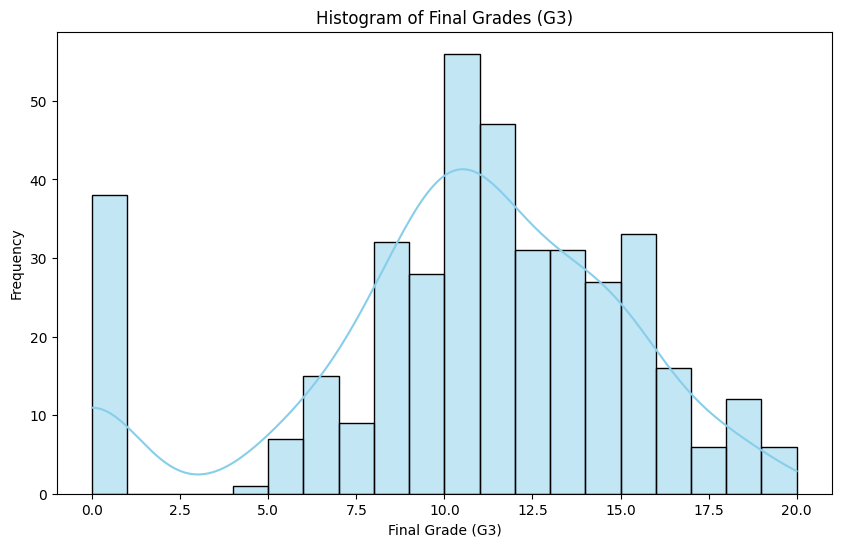

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot a histogram for the 'G3' variable
sns.histplot(df['G3'], bins=20, kde=True, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.title('Histogram of Final Grades (G3)')

# Display the plot
plt.show()


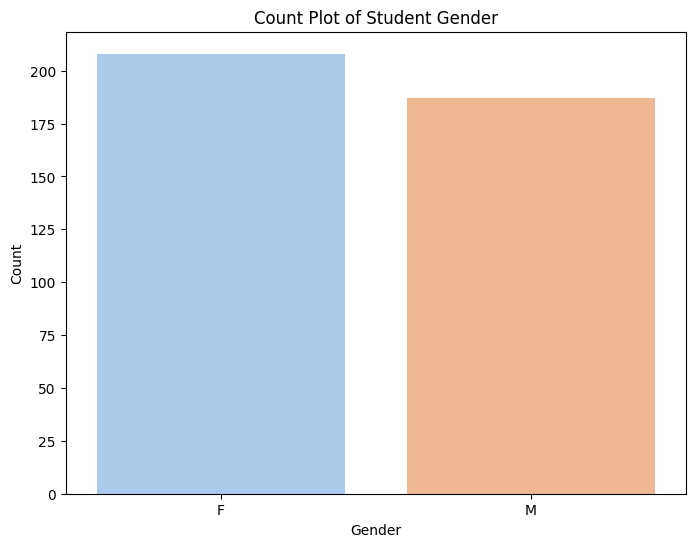

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Plot a count plot for the 'sex' variable
sns.countplot(x='sex', data=df, palette='pastel')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count Plot of Student Gender')

# Display the plot
plt.show()


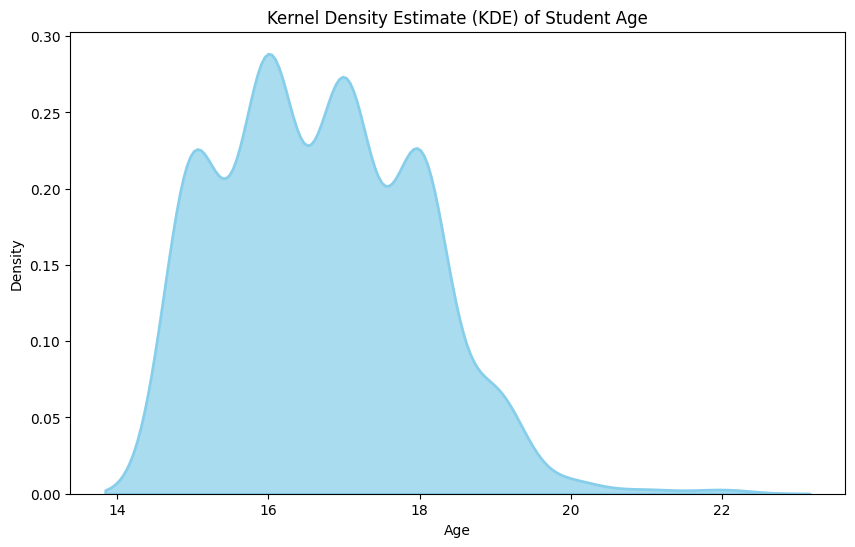

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot a KDE plot for the 'age' variable
sns.kdeplot(df['age'], fill=True, color='skyblue', alpha=0.7, linewidth=2)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) of Student Age')

# Display the plot
plt.show()


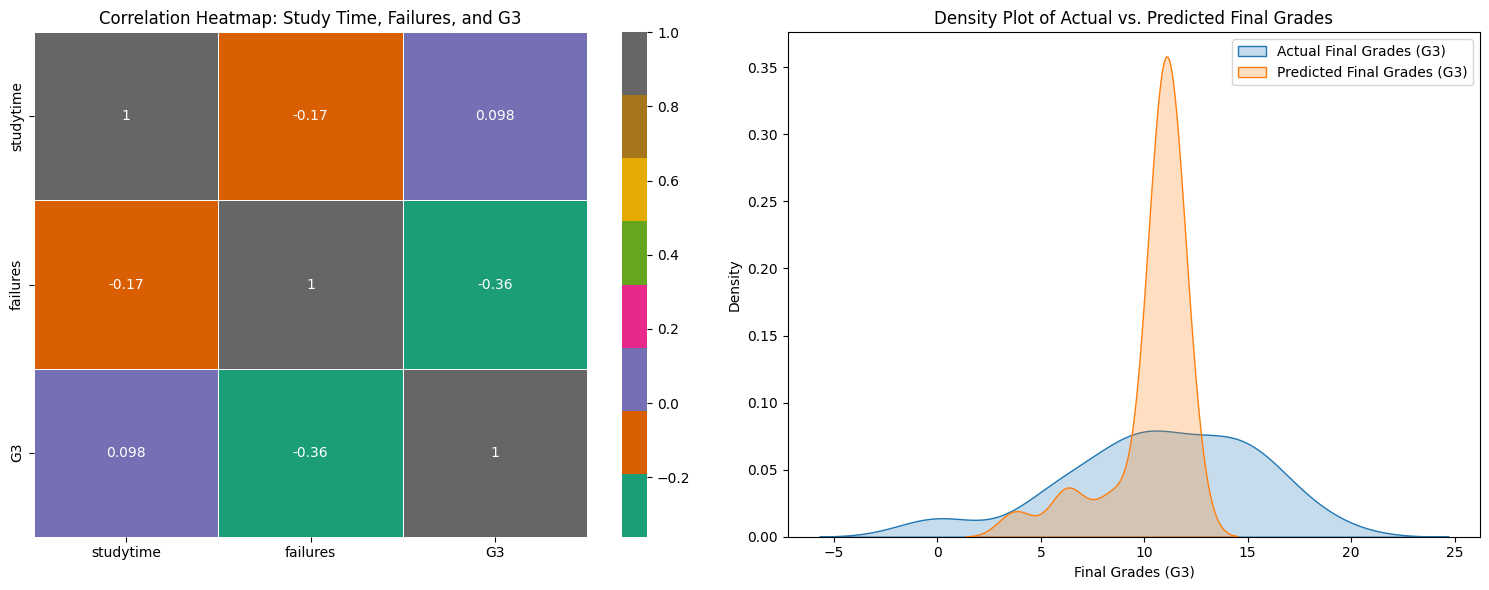

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Set up figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

### First subplot: Correlation Heatmap ###
# Select relevant variables for correlation analysis
selected_vars = ['studytime', 'failures', 'G3']
subset_corr_matrix = df[selected_vars].corr()

# Create a heatmap for the selected subset using a dark color palette
sns.heatmap(subset_corr_matrix, annot=True, cmap='Dark2', linewidths=0.5, ax=axes[0])

# Add title
axes[0].set_title('Correlation Heatmap: Study Time, Failures, and G3')

### Second subplot: Density Plot ###
# Select features (predictors) and the target variable
X = df[['studytime', 'failures']]
y = df['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

# Create a density plot for actual and predicted final grades
sns.kdeplot(y_test, label='Actual Final Grades (G3)', fill=True, ax=axes[1])
sns.kdeplot(predictions, label='Predicted Final Grades (G3)', fill=True, ax=axes[1])

axes[1].set_xlabel('Final Grades (G3)')
axes[1].set_ylabel('Density')
axes[1].set_title('Density Plot of Actual vs. Predicted Final Grades')
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


<ipython-input-17-2b9a0823bed1>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stud.loc[stud['address'] == 'U', 'G3'], label='Urban', shade = True)
<ipython-input-17-2b9a0823bed1>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stud.loc[stud['address'] == 'R', 'G3'], label='Rural', shade = True)


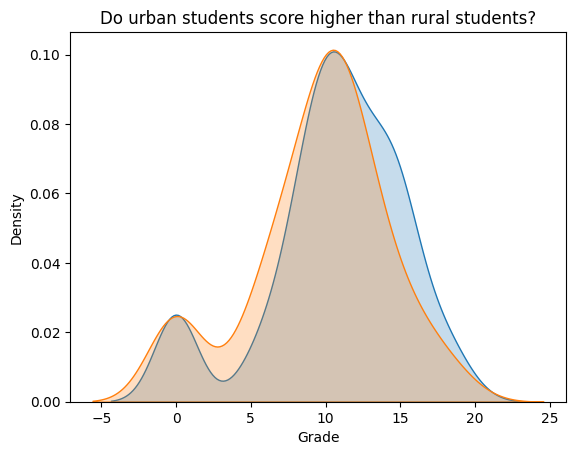

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
stud= pd.read_csv('student-mat.csv')
sns.kdeplot(stud.loc[stud['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(stud.loc[stud['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?')
plt.xlabel('Grade');
plt.ylabel('Density')
plt.show()

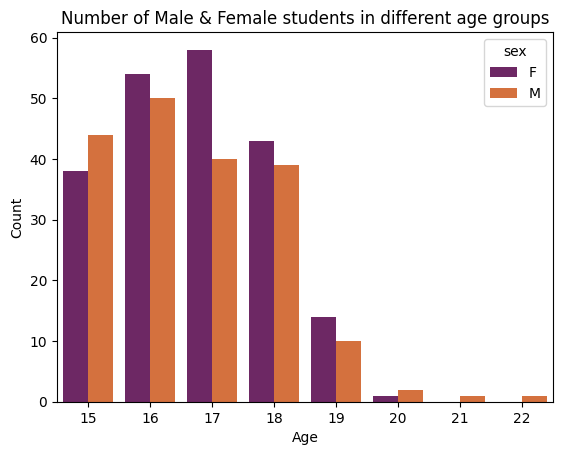

In [18]:
b = sns.countplot(x='age',hue='sex', data=stud, palette='inferno')
b.axes.set_title('Number of Male & Female students in different age groups')
b.set_xlabel("Age")
b.set_ylabel("Count")
plt.show()

Mean Absolute Error (MAE): 3.5276736256028443
Root Mean Squared Error (RMSE): 4.446149376070832


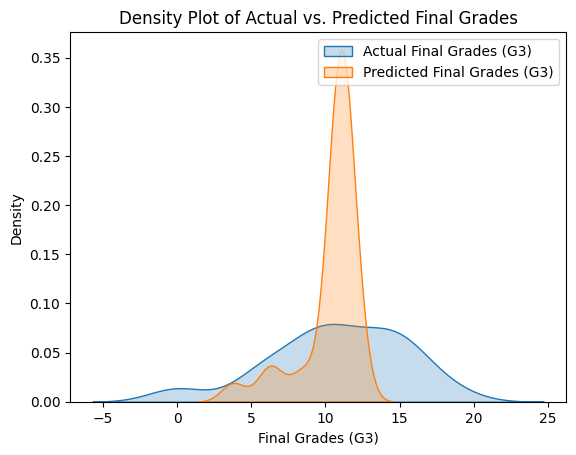

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')

# Select features (predictors) and the target variable
X = df[['studytime', 'failures']]
y = df['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # Use squared=False to get RMSE directly

# Display the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Create a density plot for actual and predicted final grades
sns.kdeplot(y_test, label='Actual Final Grades (G3)', fill=True)
sns.kdeplot(predictions, label='Predicted Final Grades (G3)', fill=True)

plt.xlabel('Final Grades (G3)')
plt.ylabel('Density')
plt.title('Density Plot of Actual vs. Predicted Final Grades')
plt.legend()
plt.show()
